In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 16})

In [2]:
# Load Data
data = pd.DataFrame({"X": np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
                     "y": np.array([1, 1.2, 1.4, 1.1, 1.0, 5.5, 6.1, 6.7, 6.4, 6, 5.9, 3, 3.2, 3.1])})
data.head()

,X,y
0,1,1.0
1,2,1.2
2,3,1.4
3,4,1.1
4,5,1.0


# DECISION TREE - REGRESSION

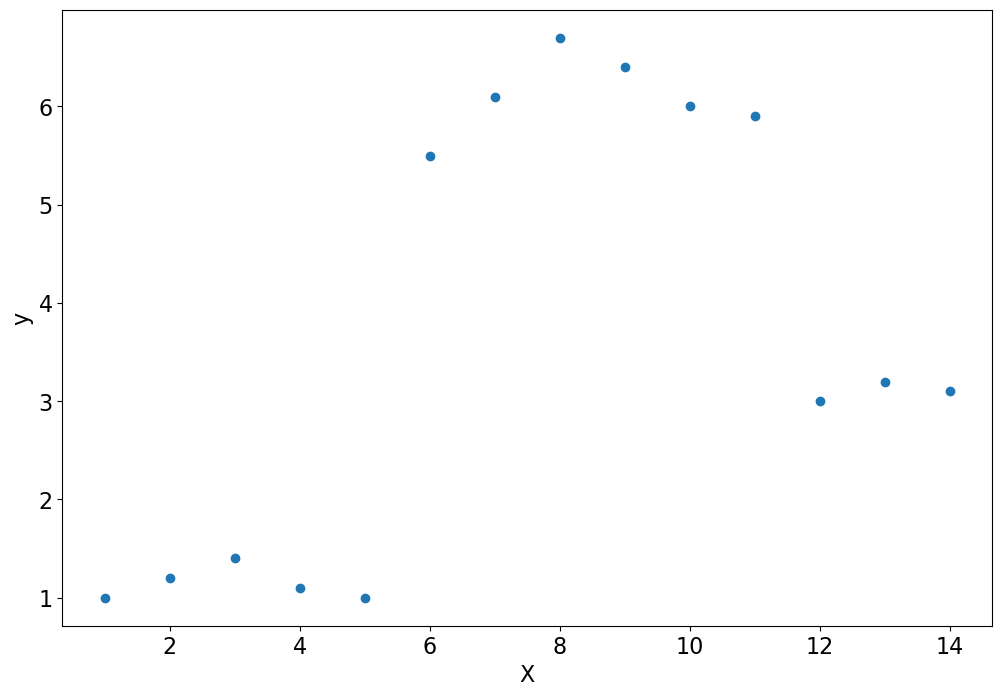

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

ax.scatter(data["X"], data["y"])

ax.set_xlabel("X")
ax.set_ylabel("y")
plt.show()

In [4]:
# Step 1
# 1. Tentukan threshold
threshold = 1.5

# 2. Bagi data menjadi 2 region, left & right
# Left --> X < threshold, Right --> X >= threshold
data_left = data[data["X"] < threshold]
data_right = data[data["X"] >= threshold]

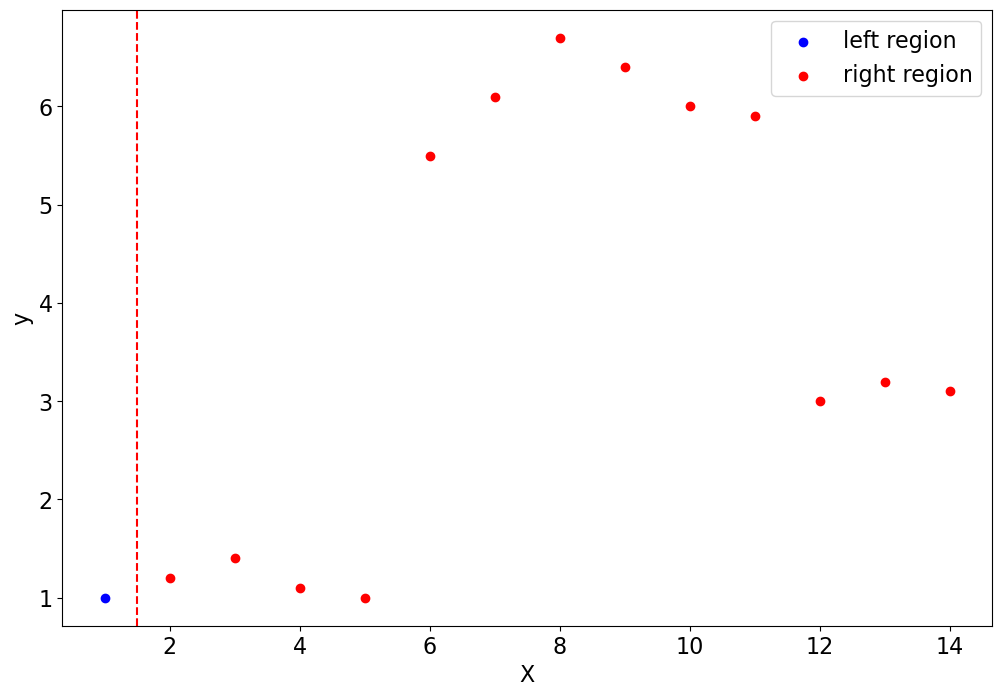

In [5]:
# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
ax.scatter(data_left["X"], data_left["y"], c="b", label="left region")
ax.scatter(data_right["X"], data_right["y"], c="r", label="right region")

# Plot threshold
ax.axvline(threshold, c="r", linestyle="--")

ax.set_xlabel("X")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [6]:
def split_a_region(data, threshold):
    """
    Fungsi untuk split region
    :param data: <pandas dataframe> sampel input
    :param threshold: <float> titik pembagi
    :return data_left: <pandas dataframe> region kiri threshold
    :return data_right: <pandas dataframe> region kanan threshold
    """
    # Split data
    data_left = data[data["X"] < threshold]
    data_right = data[data["X"] >= threshold]

    return data_left, data_right

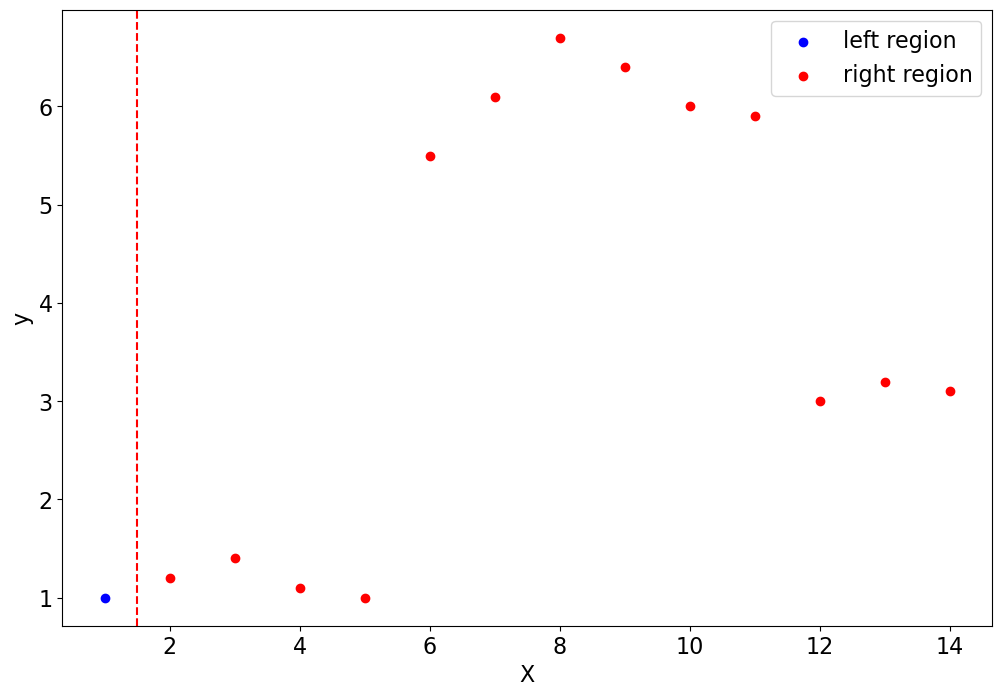

In [7]:
thresh = 6.5

data_left, data_right = split_a_region(data = data,
                                       threshold = thresh)  # dapat Anda ubah-ubah

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
ax.scatter(data_left["X"], data_left["y"], c="b", label="left region")
ax.scatter(data_right["X"], data_right["y"], c="r", label="right region")

# Plot threshold
ax.axvline(thresh, c="r", linestyle="--")

ax.set_xlabel("X")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [8]:
# Step 2, hitung prediksi & RMSE
# Prediksi adalah rata-rata dari region
def calculate_prediction(data):
    """
    Fungsi untuk menghitung prediksi tiap region.
    Prediksi adalah rata-rata "TARGET" pada masing-masing region
    :param data: <np.array> sampel di suatu region
    :return pred: <float> prediksi
    """
    # cari target
    target = data["y"]

    # cari prediksi
    pred = np.mean(target)

    return pred

def calculate_rmse(y_test, y_pred):
    """
    Fungsi untuk mencari error menggunakan mean squared error
    :param y_test: <np.array> target data aktual
    :param y_pred: <np.array> target data prediksi
    :return rmse: <float> nilai rmse
    """
    squared_error = (y_test - y_pred)**2
    mean_squared_error = np.mean(squared_error)
    rmse = np.sqrt(mean_squared_error)
    return rmse


In [9]:
# Hitung prediksi
pred_left = calculate_prediction(data = data_left)
pred_right = calculate_prediction(data = data_right)

# Hitung RMSE
rmse_left = calculate_rmse(y_test = data_left["y"], y_pred = pred_left)
rmse_right = calculate_rmse(y_test = data_right["y"], y_pred = pred_right)

# Print
print(f"Left  -> pred : {pred_left:.4f}, rmse : {rmse_left:.4f}")
print(f"Right -> pred : {pred_right:.4f}, rmse : {rmse_right:.4f}")

Left  -> pred : 1.0000, rmse : 0.0000
Right -> pred : 3.8923, rmse : 2.1773


In [10]:
# GABUNGKAN SEMUA
# Input
thresh = 5.5

# Bagi data
data_left, data_right = split_a_region(data = data,
                                       threshold = thresh)

# Predict & Hitung RMSE
# Hitung prediksi
pred_left = calculate_prediction(data = data_left)
pred_right = calculate_prediction(data = data_right)

# Hitung RMSE
rmse_left = calculate_rmse(y_test = data_left["y"], y_pred = pred_left)
rmse_right = calculate_rmse(y_test = data_right["y"], y_pred = pred_right)
rmse_total = rmse_left + rmse_right


# Print
print(f"Left  -> pred : {pred_left:.4f}, rmse : {rmse_left:.4f}")
print(f"Right -> pred : {pred_right:.4f}, rmse : {rmse_right:.4f}")
print(f"                  Total rmse : {rmse_total:.4f}")

Left  -> pred : 1.1400, rmse : 0.1497
Right -> pred : 5.1000, rmse : 1.4484
                  Total rmse : 1.5980


In [11]:
# variasiin threshold
threshold = data["X"]
thresh_list = []
rmse_list = []

for thresh in threshold:
    # Bagi data
    data_left, data_right = split_a_region(data = data,
                                        threshold = thresh)

    # Predict & Hitung RMSE
    # Hitung prediksi
    pred_left = calculate_prediction(data = data_left)
    pred_right = calculate_prediction(data = data_right)

    # Hitung RMSE
    if len(data_left) == 0:
        pass
    elif len(data_right) == 0:
        pass
    else:
        rmse_left = calculate_rmse(y_test = data_left["y"], y_pred = pred_left)
        rmse_right = calculate_rmse(y_test = data_right["y"], y_pred = pred_right)
        rmse_total = rmse_left + rmse_right

        thresh_list.append(thresh)
        rmse_list.append([rmse_left, rmse_right, rmse_total])

        # Print
        print(f"Threshold : {thresh}")
        print(f"Left  -> pred : {pred_left:.4f}, rmse : {rmse_left:.4f}")
        print(f"Right -> pred : {pred_right:.4f}, rmse : {rmse_right:.4f}")
        print(f"                  Total rmse : {rmse_total:.4f}")
        print("")

Threshold : 2
Left  -> pred : 1.0000, rmse : 0.0000
Right -> pred : 3.8923, rmse : 2.1773
                  Total rmse : 2.1773

Threshold : 3
Left  -> pred : 1.1000, rmse : 0.1000
Right -> pred : 4.1167, rmse : 2.1169
                  Total rmse : 2.2169

Threshold : 4
Left  -> pred : 1.2000, rmse : 0.1633
Right -> pred : 4.3636, rmse : 2.0388
                  Total rmse : 2.2021

Threshold : 5
Left  -> pred : 1.1750, rmse : 0.1479
Right -> pred : 4.6900, rmse : 1.8442
                  Total rmse : 1.9921

Threshold : 6
Left  -> pred : 1.1400, rmse : 0.1497
Right -> pred : 5.1000, rmse : 1.4484
                  Total rmse : 1.5980

Threshold : 7
Left  -> pred : 1.8667, rmse : 1.6306
Right -> pred : 5.0500, rmse : 1.5289
                  Total rmse : 3.1595

Threshold : 8
Left  -> pred : 2.4714, rmse : 2.1151
Right -> pred : 4.9000, rmse : 1.5784
                  Total rmse : 3.6935

Threshold : 9
Left  -> pred : 3.0000, rmse : 2.4228
Right -> pred : 4.6000, rmse : 1.5089
       

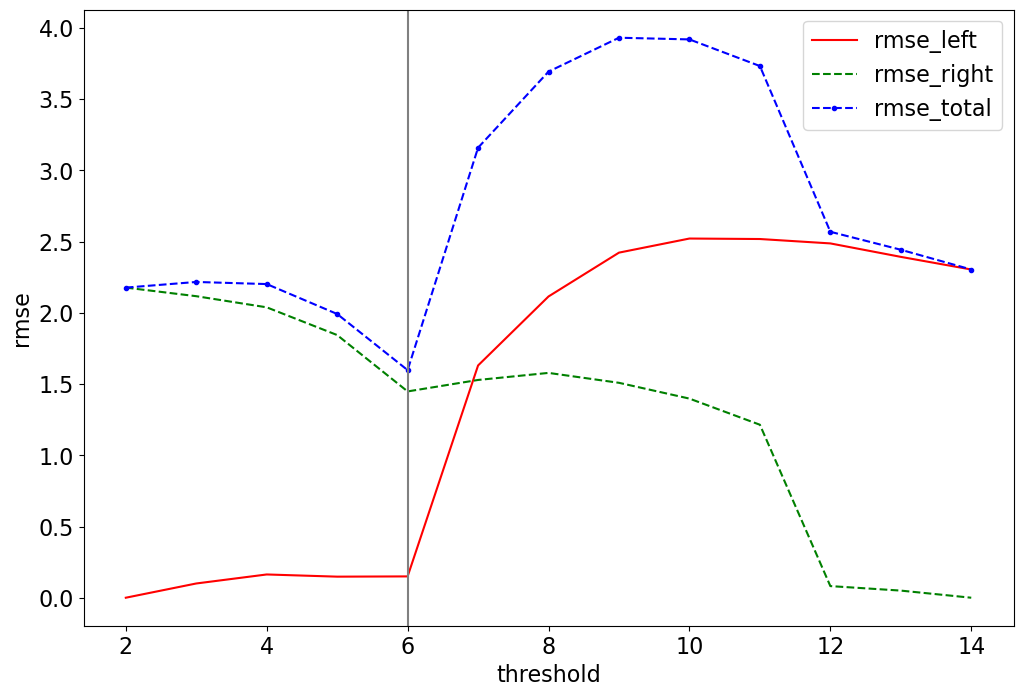


Best Threshold : 6


In [12]:
# ----
# output
thresh_list = np.array(thresh_list)
rmse_list = np.array(rmse_list)

# Ekstrak
rmse_left = rmse_list[:, 0]
rmse_right = rmse_list[:, 1]
rmse_total = rmse_list[:, 2]
best_threshold = thresh_list[np.argmin(rmse_total)]

# Plot RMSE
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.plot(thresh_list, rmse_left, "r", label="rmse_left")
ax.plot(thresh_list, rmse_right, "--g", label="rmse_right")
ax.plot(thresh_list, rmse_total, "--.b", label="rmse_total")

# Plot best threshold
ax.axvline(best_threshold, c="gray")

ax.set_xlabel("threshold")
ax.set_ylabel("rmse")
ax.legend()

plt.show()

print("")
print(f"Best Threshold : {best_threshold}")

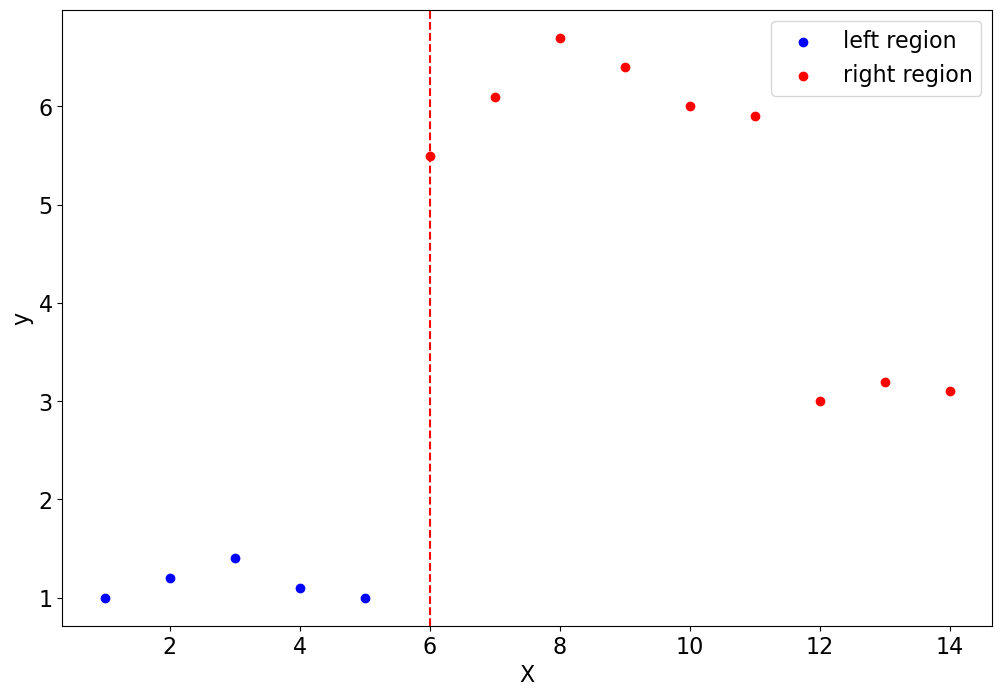

In [14]:
data_left, data_right = split_a_region(data = data,
                                       threshold = best_threshold) 

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
ax.scatter(data_left["X"], data_left["y"], c="b", label="left region")
ax.scatter(data_right["X"], data_right["y"], c="r", label="right region")

# Plot threshold
ax.axvline(best_threshold, c="r", linestyle="--")

ax.set_xlabel("X")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [15]:
# Buat jadi 1 fungsi
def create_a_tree(data):
    threshold = data["X"]
    thresh_list = []
    rmse_list = []

    for thresh in threshold:
        # Bagi data
        data_left, data_right = split_a_region(data = data,
                                               threshold = thresh)

        # Predict & Hitung RMSE
        # Hitung prediksi
        pred_left = calculate_prediction(data = data_left)
        pred_right = calculate_prediction(data = data_right)

        # Hitung RMSE
        if len(data_left) == 0:
            pass
        elif len(data_right) == 0:
            pass
        else:
            rmse_left = calculate_rmse(y_test = data_left["y"], y_pred = pred_left)
            rmse_right = calculate_rmse(y_test = data_right["y"], y_pred = pred_right)
            rmse_total = rmse_left + rmse_right

            thresh_list.append(thresh)
            rmse_list.append([rmse_left, rmse_right, rmse_total])

            # Print
            #print(f"Threshold : {thresh}")
            #print(f"Left  -> pred : {pred_left:.4f}, rmse : {rmse_left:.4f}")
            #print(f"Right -> pred : {pred_right:.4f}, rmse : {rmse_right:.4f}")
            #print(f"                  Total rmse : {rmse_total:.4f}")
            #print("")

    # output
    thresh_list = np.array(thresh_list)
    rmse_list = np.array(rmse_list)

    # Ekstrak
    rmse_left = rmse_list[:, 0]
    rmse_right = rmse_list[:, 1]
    rmse_total = rmse_list[:, 2]
    best_threshold = thresh_list[np.argmin(rmse_total)]
    best_rmse = np.min(rmse_total)

    # Split data based on best threshold
    data_left, data_right = split_a_region(data = data,
                                           threshold = best_threshold)
    

    return data_left, data_right, best_threshold, best_rmse
    
    

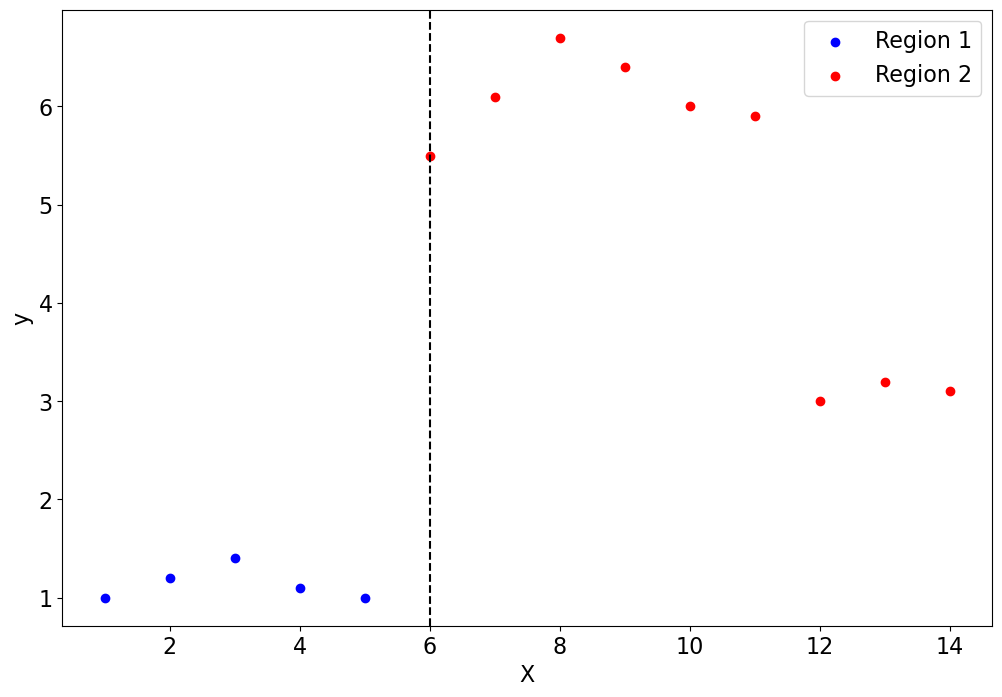

In [16]:
# buat tree ke-1
# Create a tree
data_1, data_2, thresh_1, rmse_1 = create_a_tree(data = data)


# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
ax.scatter(data_1["X"], data_1["y"], c="b", label="Region 1")
ax.scatter(data_2["X"], data_2["y"], c="r", label="Region 2")

# Plot threshold
ax.axvline(thresh_1, c="k", linestyle="--")

ax.set_xlabel("X")
ax.set_ylabel("y")
ax.legend()
plt.show()

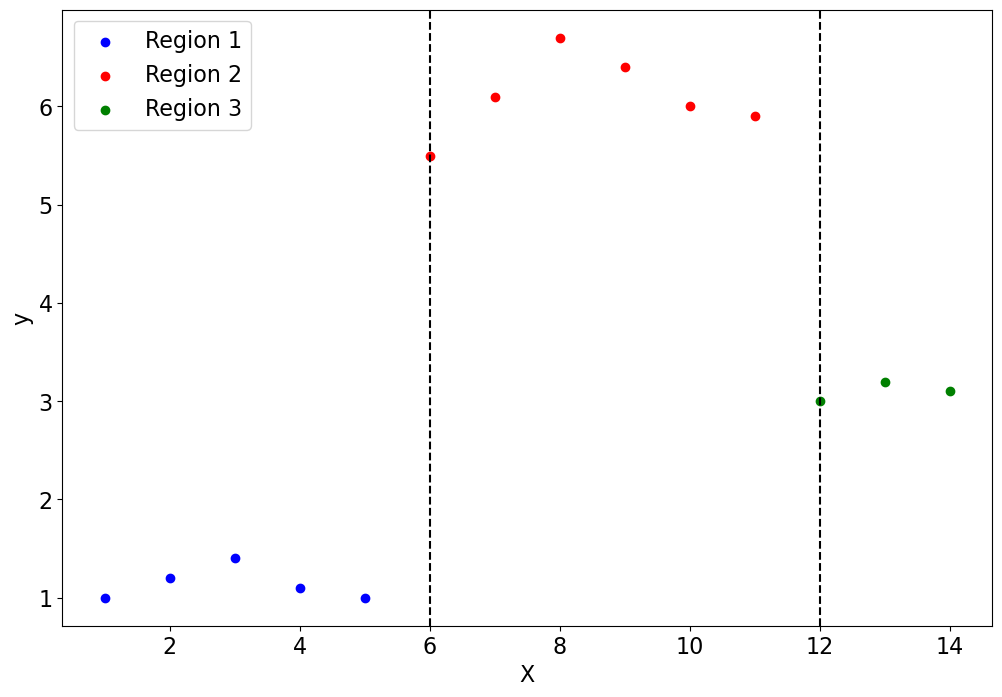

In [17]:
# tree ke-2
# Create a tree
data_2, data_3, thresh_2, rmse_2 = create_a_tree(data = data_2)


# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
ax.scatter(data_1["X"], data_1["y"], c="b", label="Region 1")
ax.scatter(data_2["X"], data_2["y"], c="r", label="Region 2")
ax.scatter(data_3["X"], data_3["y"], c="g", label="Region 3")

# Plot threshold
ax.axvline(thresh_1, c="k", linestyle="--")
ax.axvline(thresh_2, c="k", linestyle="--")

ax.set_xlabel("X")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [19]:
create_a_tree(data = data_2)

(   X    y
 5  6  5.5,
      X    y
 6    7  6.1
 7    8  6.7
 8    9  6.4
 9   10  6.0
 10  11  5.9,
 7,
 0.2925747767665559)

# sklearn

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
# Buat objek
regressor = DecisionTreeRegressor(criterion = "squared_error",
                                  random_state=0)

# Fit ke data
regressor.fit(X = np.array(data["X"]).reshape(-1, 1),
              y = np.array(data["y"]).reshape(-1, 1))

DecisionTreeRegressor(random_state=0)

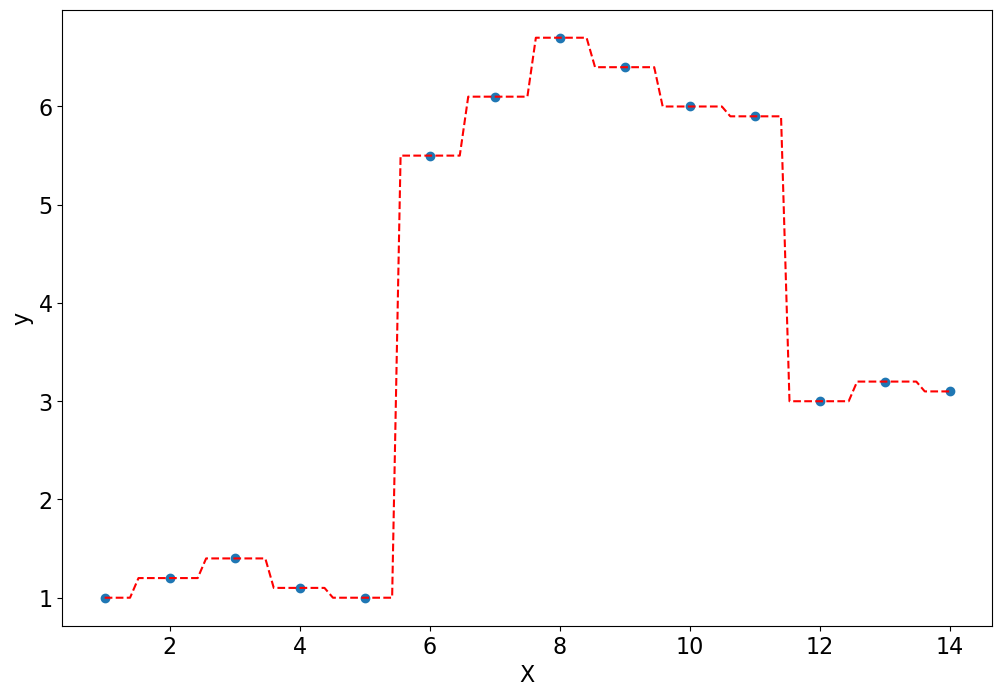

In [22]:
# Prediction
X_pred = np.linspace(data["X"].min(), data["X"].max(), 101)
y_pred = regressor.predict(np.array(X_pred).reshape(-1, 1))


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

ax.scatter(data["X"], data["y"])
ax.plot(X_pred, y_pred, "--r")

ax.set_xlabel("X")
ax.set_ylabel("y")
plt.show()

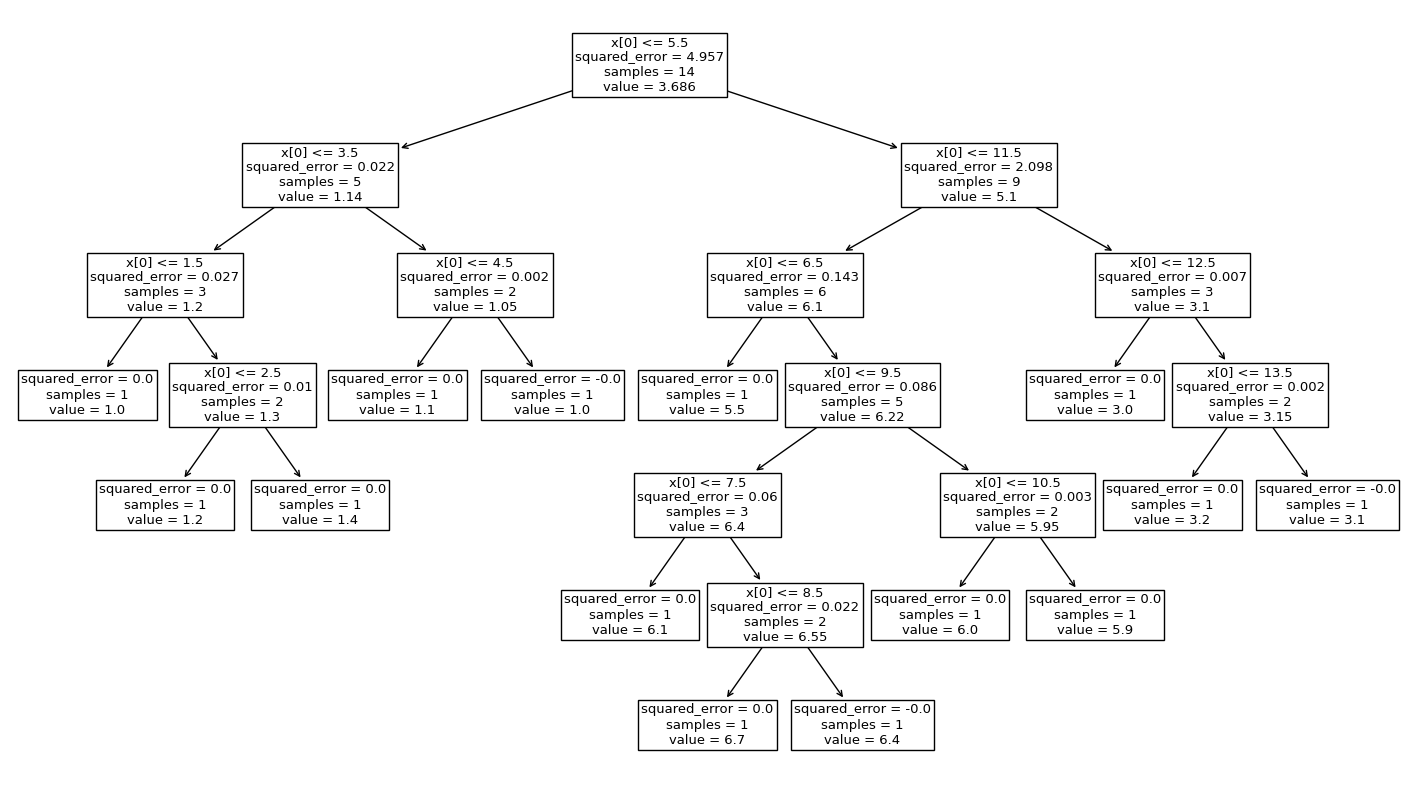

In [23]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(18, 10))
_ = plot_tree(regressor, ax=ax)

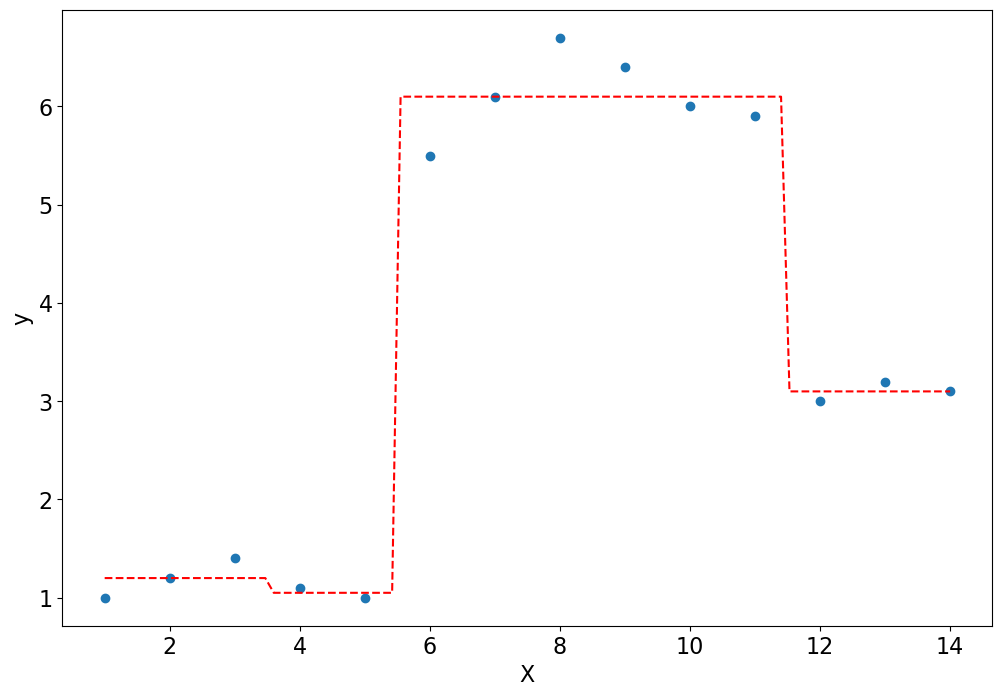

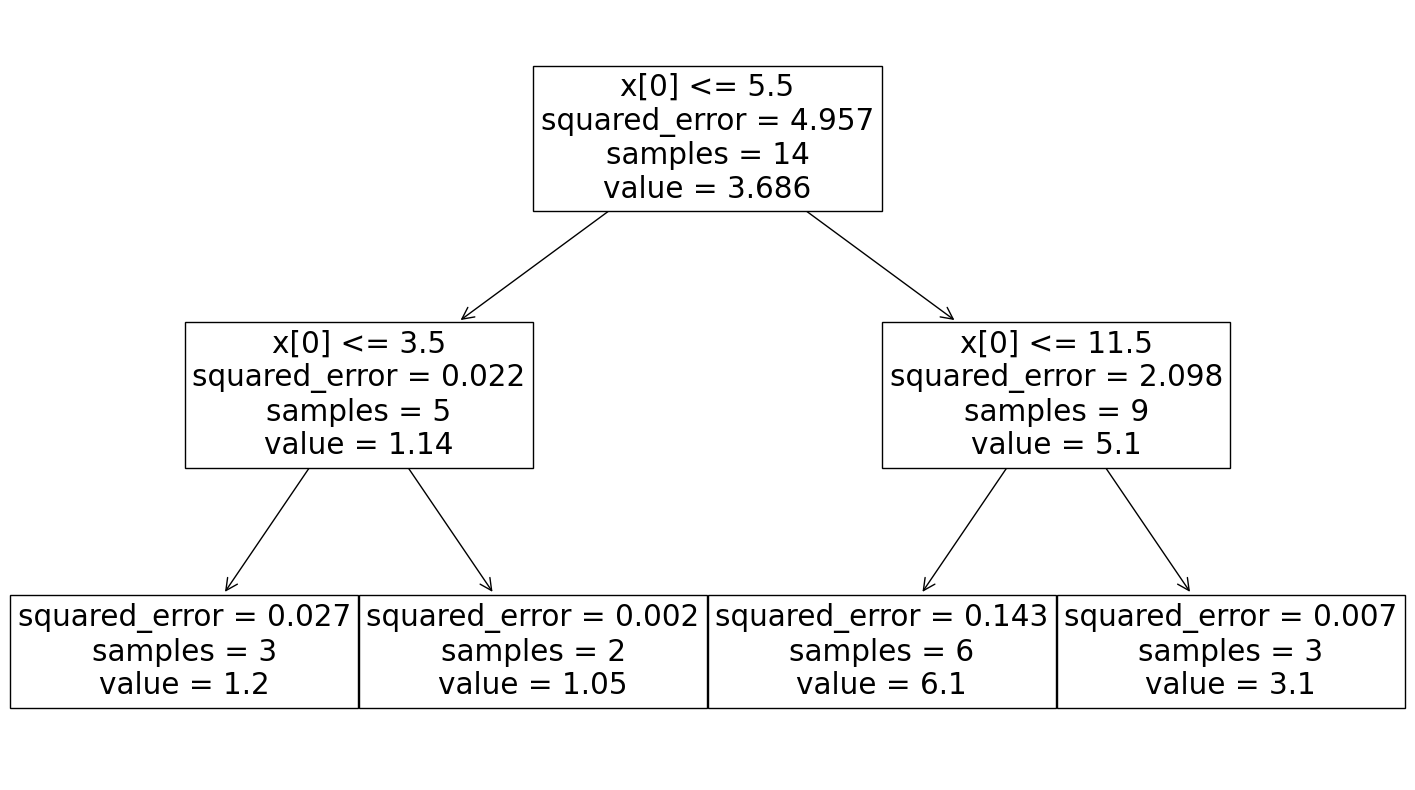

In [24]:
# ubah kedalaman tree

# Buat objek
regressor = DecisionTreeRegressor(criterion = "squared_error",
                                  max_depth = 2,
                                  random_state=0)

# Fit ke data
regressor.fit(X = np.array(data["X"]).reshape(-1, 1),
              y = np.array(data["y"]).reshape(-1, 1))

# Prediction
X_pred = np.linspace(data["X"].min(), data["X"].max(), 101)
y_pred = regressor.predict(np.array(X_pred).reshape(-1, 1))


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

ax.scatter(data["X"], data["y"])
ax.plot(X_pred, y_pred, "--r")

ax.set_xlabel("X")
ax.set_ylabel("y")
plt.show()

_, ax = plt.subplots(figsize=(18, 10))
_ = plot_tree(regressor, ax=ax)

# Decision Tree - Classification

In [25]:
# hitung entropy nya

# Set yang pure
set_1 = pd.DataFrame({"target": ["yes", "yes", "yes", "yes", "yes"]})

In [26]:
# 1. cari informasi proporsi kelas yang ada pada set
proba = set_1.value_counts(normalize = True)
proba

target
yes       1.0
dtype: float64

In [27]:
# 2. hitung entropy
sum = 0
for i in proba.index:
    proba_i = proba[i]
    sum += - (proba_i * np.log2(proba_i))

sum
# Entropy = 0.0 --> data TIDAK tidak teratur --> data teratur --> homogen

0.0

In [28]:
def calc_entropy(data):
    """
    Fungsi mencari entropy dari data yang dimasukkan
    :param data: <pandas dataframe/series> data sampel
    :return entropy: <float> entropy dari sampel data
    """
    # 1. Cari informasi proporsi kelas yang ada pada data
    proba = data.value_counts(normalize = True)

    # 2. Hitung entropy
    entropy = 0
    for i in proba.index:
        proba_i = proba[i]
        entropy += - (proba_i * np.log2(proba_i))

    return entropy


In [29]:
print(calc_entropy(data = set_1))

0.0


In [30]:
# Set yang sangat heterogen
set_2 = pd.DataFrame({"target": ["yes", "yes", "yes", "yes",
                                 "no", "no", "no", "no"]})

# hitung entropy
calc_entropy(data = set_2)

1.0

bahas tentang play tennis

In [31]:
# Load Data
data = pd.read_csv("data/play_tennis.csv")
data.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


- Untuk buat decision tree, pilih fitur yang information gain-nya paling besar.
- Information gain = entropy(parent) - average(entropy children)

In [32]:
# 1. Cari data parent & hitung entropynya
parent = "outlook"
parent_data = data[[parent, "play"]]

parent_entropy = calc_entropy(data = parent_data["play"])
parent_entropy

0.9402859586706311

In [33]:
# 2. Cari data childer & hitung entropynya
children = parent_data[parent].unique()

children_entropy = np.zeros(len(children))
children_qty = np.zeros(len(children))
for i, child in enumerate(children):
    child_data = parent_data[parent_data[parent] == child]
    child_entropy = calc_entropy(data = child_data)

    children_entropy[i] = child_entropy
    children_qty[i] = len(child_data)

print(children_entropy)
print(children_qty)

[0.97095059 0.         0.97095059]
[5. 4. 5.]


In [34]:
# 3. Cari information gain
mean_children_entropy = np.dot(children_entropy, children_qty)/len(parent_data)

info_gain = parent_entropy - mean_children_entropy
info_gain

0.24674981977443922

In [35]:
def calc_info_gain(data, parent):
    """
    Fungsi untuk menghitung information gain
    :param data: <pandas dataframe> sample data
    :param parent: <str> nama fitur parent
    :return info_gain: <float> information gain
    """
    # 1. Cari data parent & hitung entropynya
    parent_data = data[[parent, "play"]]
    parent_entropy = calc_entropy(data = parent_data["play"])

    # 2. Cari data childer & hitung entropynya
    children = parent_data[parent].unique()

    children_entropy = np.zeros(len(children))
    children_qty = np.zeros(len(children))
    for i, child in enumerate(children):
        child_data = parent_data[parent_data[parent] == child]
        child_entropy = calc_entropy(data = child_data)

        children_entropy[i] = child_entropy
        children_qty[i] = len(child_data)

    # 3. Cari information gain
    mean_children_entropy = np.dot(children_entropy, children_qty)/len(parent_data)

    info_gain = parent_entropy - mean_children_entropy
    
    return info_gain


In [36]:
calc_info_gain(data = data,
               parent = "outlook")

0.24674981977443922

In [37]:
calc_info_gain(data = data,
               parent = "temp")

0.029222565658954758

In [38]:
# Lebih detail
for feat in data.columns:
    if feat != "play":
        info_gain_feat = calc_info_gain(data = data,
                                        parent = feat)
        print(f"IG {feat}: {info_gain_feat:.4f}")

IG outlook: 0.2467
IG temp: 0.0292
IG humidity: 0.1518
IG wind: 0.0481


In [39]:
data["outlook"].value_counts()

Sunny       5
Rain        5
Overcast    4
Name: outlook, dtype: int64

1st depth
```
outlook:
- Sunny
- Rain
- Overcast
```

In [40]:
# Buat fungsi
def get_a_node(data):
    """
    Fungsi untuk dapat fitur yang jadi node
    :param data: <pandas dataframe> sampel data
    """
    # Lebih detail
    for feat in data.columns:
        if feat != "play":
            info_gain_feat = calc_info_gain(data = data,
                                            parent = feat)
            print(f"IG {feat}: {info_gain_feat:.4f}")

In [41]:
# sekarang fokus ke branch sunny
branch_1_data = data[data["outlook"]=="Sunny"]
get_a_node(data = branch_1_data)

branch_1_data

# next node --> humidity

IG outlook: 0.0000
IG temp: 0.5710
IG humidity: 0.9710
IG wind: 0.0200


,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


In [42]:
# sekarang fokus ke branch Rain
branch_2_data = data[data["outlook"]=="Rain"]
get_a_node(data = branch_2_data)

branch_2_data

# next node --> wind

IG outlook: 0.0000
IG temp: 0.0200
IG humidity: 0.0200
IG wind: 0.9710


,outlook,temp,humidity,wind,play
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
9,Rain,Mild,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


In [43]:
# sekarang fokus ke branch Overcast
branch_3_data = data[data["outlook"]=="Overcast"]
get_a_node(data = branch_3_data)

branch_3_data

# Semua data homogen

IG outlook: 0.0000
IG temp: 0.0000
IG humidity: 0.0000
IG wind: 0.0000


,outlook,temp,humidity,wind,play
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


2nd depth
```
outlook:
- Sunny
  - Humidity
- Rain
  - Wind
- Overcast --> yes
```

In [44]:
branch_1_data["humidity"].unique()

array(['High', 'Normal'], dtype=object)

In [45]:
# sekarang fokus ke branch berikutnya
branch_1_1_data = branch_1_data[branch_1_data["humidity"] == "High"]
get_a_node(data = branch_1_1_data)

branch_1_1_data

# homogen --> if humidity==high, predict no

IG outlook: 0.0000
IG temp: 0.0000
IG humidity: 0.0000
IG wind: 0.0000


,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No


In [46]:
# sekarang fokus ke branch berikutnya
branch_1_2_data = branch_1_data[branch_1_data["humidity"] == "Normal"]
get_a_node(data = branch_1_2_data)

branch_1_2_data

# homogen --> if humidity==Normal, predict yes

IG outlook: 0.0000
IG temp: 0.0000
IG humidity: 0.0000
IG wind: 0.0000


,outlook,temp,humidity,wind,play
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


2nd depth
```
outlook:
- Sunny
  - Humidity:
    - High --> No
    - Normal --> Yes
- Rain
  - Wind:
- Overcast --> yes
```

In [47]:
# next kalau dia rain
branch_2_data["wind"].unique()

array(['Weak', 'Strong'], dtype=object)

In [48]:
# sekarang fokus ke branch berikutnya
branch_2_1_data = branch_2_data[branch_2_data["wind"] == "Weak"]
get_a_node(data = branch_2_1_data)

branch_2_1_data

# homogen --> if wind==weak, predict Yes

IG outlook: 0.0000
IG temp: 0.0000
IG humidity: 0.0000
IG wind: 0.0000


,outlook,temp,humidity,wind,play
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [49]:
# sekarang fokus ke branch berikutnya
branch_2_2_data = branch_2_data[branch_2_data["wind"] == "Strong"]
get_a_node(data = branch_2_2_data)

branch_2_2_data

# homogen --> if wind==strong, predict No

IG outlook: 0.0000
IG temp: 0.0000
IG humidity: 0.0000
IG wind: 0.0000


,outlook,temp,humidity,wind,play
5,Rain,Cool,Normal,Strong,No
13,Rain,Mild,High,Strong,No


2nd depth
```
outlook:
- Sunny
  - Humidity:
    - High --> No
    - Normal --> Yes
- Rain
  - Wind:
    - Weak --> Yes
    - Strong --> No
- Overcast --> yes
```

Menggunakan sklearn

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
classifier = DecisionTreeClassifier(criterion = "entropy",
                                    random_state = 0)

In [52]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Transform data jangan lupa
X = data[["outlook", "temp", "humidity", "wind"]].apply(encoder.fit_transform)
X

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [53]:
data

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [54]:
# Fit data
classifier.fit(X = X,
               y = data[["play"]])

DecisionTreeClassifier(criterion='entropy', random_state=0)

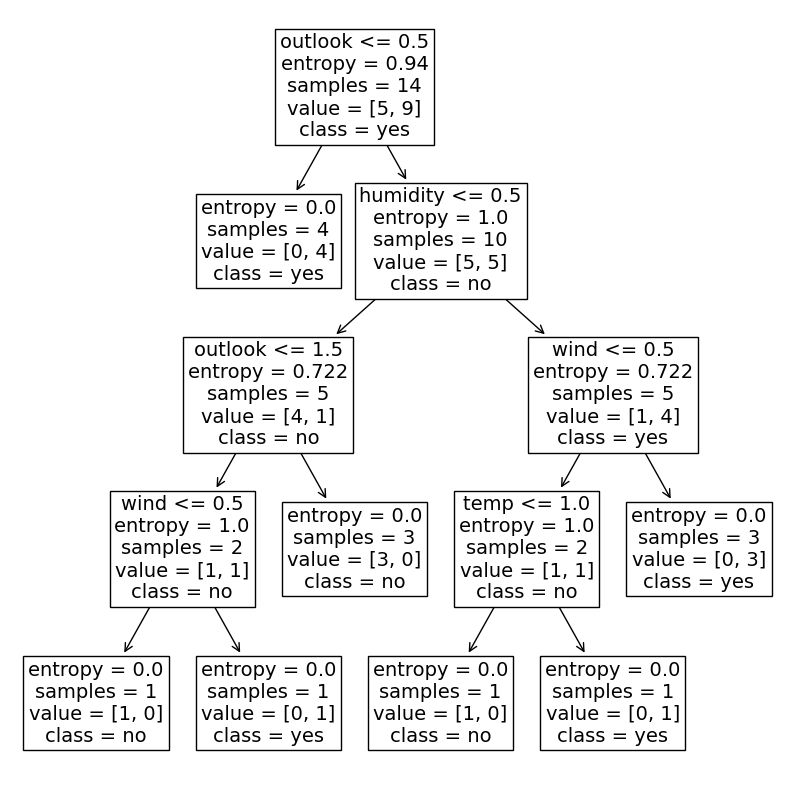

In [55]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(classifier, feature_names=X.columns, ax=ax,
              class_names=['no','yes'])

outlook
- 0 -> overcast
- 1 -> Rain
- 2 -> sunny

humidity
- 0 -> high
- 1 -> normal

wind
- 0 -> strong
- 1 -> weak

```
outlook:
- Sunny
  - Humidity:
    - High --> No
    - Normal --> Yes
- Rain
  - Wind:
    - Weak --> Yes
    - Strong --> No
- Overcast --> yes
```

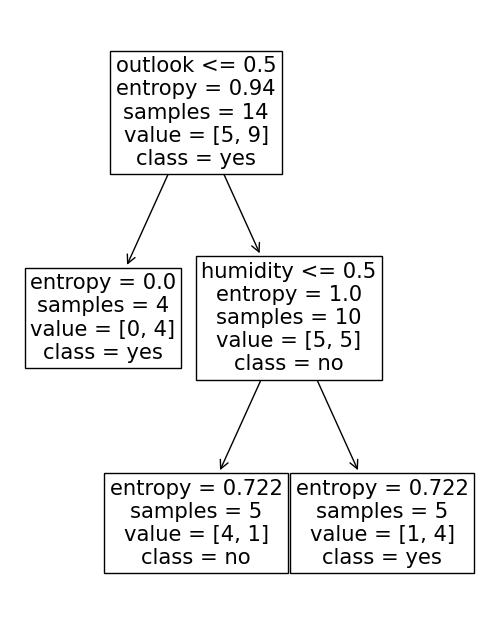

In [56]:
# Depth tree = 2
classifier = DecisionTreeClassifier(criterion = "entropy",
                                    max_depth = 2,
                                    random_state = 0)

# Fit data
classifier.fit(X = X,
               y = data[["play"]])

_, ax = plt.subplots(figsize=(6, 8))
_ = plot_tree(classifier, feature_names=X.columns, ax=ax,
              class_names=['no','yes'])